In [1]:
#Cargar la biblioteca pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Descarga los datos de una estación del Servicio Meteorológico Nacional
# http://smn1.conagua.gob.mx/emas/
# Lee un archivo de texto con la función Pandas "read_csv", con elementos separados por mas de 
# un espacio, brincándose 4 renglones del inicio (encabezados)
df0 = pd.read_csv('hermosillo.txt', skiprows=19, sep='\s+',header=None,names=["DD/MM/YY","PRECIP","EVAP","TMAX","TMIN"])
# "Shift + Enter"

In [3]:
# Combinar las columnas "DD/MM/AAAA" con "HH:MM" y convertirla a variable de tiempo
# Se crea una nueva columna "Fecha" al final con formato de tiempo.
# Eliminamos las dos primeras columnas que ya no necesitaremos
#FECHA
df0['FECHA'] = pd.to_datetime(df0.apply(lambda x: x['DD/MM/YY'], 1), dayfirst=True)
df0 = df0.drop(['DD/MM/YY'], 1)
#Presipitación
#df0['PRECIPITACIÓN'] = pd.to_datefloat(df0.apply(lambda x: x['PRECIP'], 1), dayfirst=True)
#df0 = df0.drop(['PRECIP'], 1)

In [4]:
#Tipos de variables
df0.dtypes

PRECIP           float64
EVAP             float64
TMAX             float64
TMIN             float64
FECHA     datetime64[ns]
dtype: object

In [5]:
#Crea una columna de años
df0['MES'] = pd.DatetimeIndex(df0["FECHA"]).month

#Crea una columa de años
df0["AÑO"] = pd.DatetimeIndex(df0["FECHA"]).year

#Crea una columa de los dias
df0["DIA"] = pd.DatetimeIndex(df0["FECHA"]).day

In [6]:
# Lee los primeros 5 renglones del archivo
df0.head()
# "Shift+Enter"

,PRECIP,EVAP,TMAX,TMIN,FECHA,MES,AÑO,DIA
0,0.0,NaN,28.0,NaN,1981-10-14,10,1981,14
1,0.0,7.3,26.0,14.0,1981-10-15,10,1981,15
2,0.0,7.6,28.0,12.5,1981-10-16,10,1981,16
3,0.0,8.1,28.0,10.0,1981-10-17,10,1981,17
4,0.0,1.2,30.5,9.5,1981-10-18,10,1981,18


In [7]:
#Guarda en un arreglo la precipitacion acumulada promedio por año 
df1 = df0.set_index('FECHA').resample('Y')["PRECIP"].mean()

[Text(0, 0, '1981'),
 Text(0, 0, '1982'),
 Text(0, 0, '1983'),
 Text(0, 0, '1984'),
 Text(0, 0, '1985'),
 Text(0, 0, '1986'),
 Text(0, 0, '1987'),
 Text(0, 0, '1988'),
 Text(0, 0, '1989'),
 Text(0, 0, '1990'),
 Text(0, 0, '1991'),
 Text(0, 0, '1992'),
 Text(0, 0, '1993'),
 Text(0, 0, '1994'),
 Text(0, 0, '1995'),
 Text(0, 0, '1996'),
 Text(0, 0, '1997'),
 Text(0, 0, '1998')]

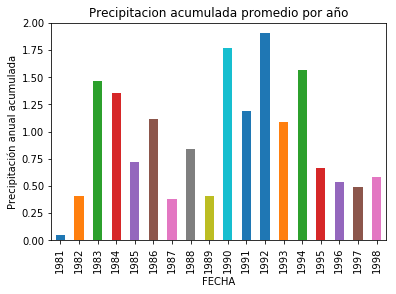

In [8]:
#Grafica d ela precipitacion acumulada por año
ax = df1.plot.bar(x='PRECIP', y='FECHA')
ax.set_ylabel("Precipitación anual acumulada")
ax.set_title('Precipitacion acumulada promedio por año')
ax.set_xticklabels(('1981', '1982', '1983', '1984', '1985', "1986", "1987" , "1988" , "1989" , "1990", "1991" ,"1992", "1993","1994","1995","1996","1997","1998"))



In [9]:
#Guarda en un arreglo la precipitacion acumulada promedio por mes
df2 = df0.set_index('FECHA').resample('M')["PRECIP"].mean()

In [10]:
dfmes = pd.DataFrame()
años = len(df0['AÑO'].unique())
dfmes["MES"] = [i for i in range(1, 13)]
dfmes["PRECIP"] = [df0[df0.MES==i].PRECIP.mean() for i in range (1,13)]
dfmes["TMAX"] = [df0[df0.MES==i].TMAX.mean() for i in range (1,13)]
dfmes["TMIN"] = [df0[df0.MES==i].TMIN.mean() for i in range (1,13)]

[Text(0, 0, 'ENE'),
 Text(0, 0, 'FEB'),
 Text(0, 0, 'MAR'),
 Text(0, 0, 'ABR'),
 Text(0, 0, 'MAY'),
 Text(0, 0, 'JUN'),
 Text(0, 0, 'JUL'),
 Text(0, 0, 'AGO'),
 Text(0, 0, 'SEP'),
 Text(0, 0, 'OCT'),
 Text(0, 0, 'NOV'),
 Text(0, 0, 'DIC')]

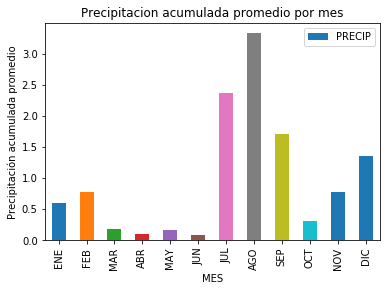

In [11]:
ax = dfmes.plot.bar(x='MES', y='PRECIP')
ax.set_ylabel('Precipitación acumulada promedio')
ax.set_title('Precipitacion acumulada promedio por mes')
ax.set_xticklabels(("ENE","FEB","MAR","ABR","MAY","JUN","JUL","AGO","SEP","OCT","NOV","DIC"))


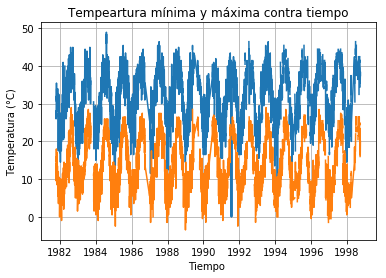

In [12]:
# Data for plotting
t = df0["FECHA"]
s1 = df0["TMAX"] 
s2 = df0["TMIN"] 

fig, ax = plt.subplots()
ax.plot(t, s1)
ax.plot(t, s2)

ax.set(xlabel='Tiempo ', ylabel='Temperatura (°C)',
       title="Tempeartura mínima y máxima contra tiempo")
ax.grid()

fig.savefig("test.png")
plt.show()

Text(0, 0.5, 'Temperatura °C')

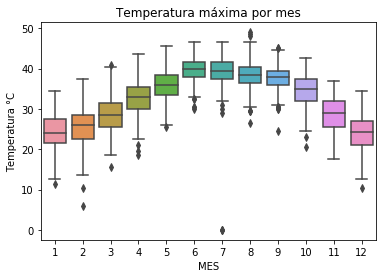

In [13]:
ax = sns.boxplot(x="MES", y="TMAX", data=df0)
plt.title("Temperatura máxima por mes")
plt.ylabel ("Temperatura °C")


Text(0, 0.5, 'Temperatura °C')

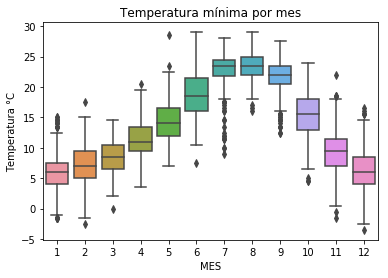

In [14]:
ax = sns.boxplot(x="MES", y="TMIN", data=df0)
plt.title("Temperatura mínima por mes")
plt.ylabel ("Temperatura °C")

Text(0, 0.5, 'Temperatura °C')

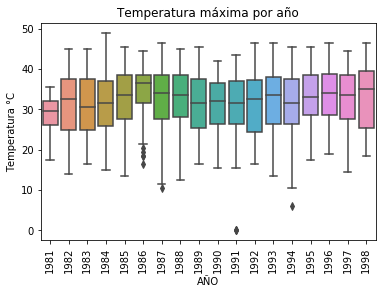

In [15]:
ax = sns.boxplot(x="AÑO", y="TMAX", data=df0)
plt.xticks(rotation=90)
plt.title("Temperatura máxima por año")
plt.ylabel ("Temperatura °C")

Text(0, 0.5, 'Temperatura °C')

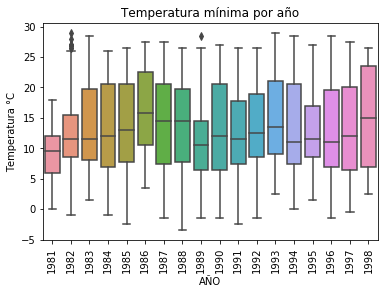

In [16]:
ax = sns.boxplot(x="AÑO", y="TMIN", data=df0)
plt.xticks(rotation=90)
plt.title("Temperatura mínima por año")
plt.ylabel ("Temperatura °C")